In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
wine=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep="\t")
import matplotlib as mp
import seaborn as sns
import datetime
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
0
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


0

In [2]:
wine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
wine.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
wine["Spending"]=wine['MntWines']+wine['MntFruits']+wine['MntMeatProducts']+wine['MntFishProducts']+wine['MntSweetProducts']+wine['MntGoldProds']
wine["Age"]=2021-wine["Year_Birth"]
wine["Marital_Status"]=wine["Marital_Status"].replace({"Single":"Alone","Together":"In couple","Divorced":"Alone","Married":"In couple"})
wine["Year_Birth"]=wine["Age"]
wine["Children"]=wine["Kidhome"]+ wine["Teenhome"]
wine["Kidhome"]=wine["Children"]
wine["Has_child"]=np.where(wine.Children>0,"Has child","No child")
wine


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Age,Children,Has_child
0,5524,64,Graduation,Alone,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1617,64,0,No child
1,2174,67,Graduation,Alone,46344.0,2,1,08-03-2014,38,11,...,0,0,0,3,11,0,27,67,2,Has child
2,4141,56,Graduation,In couple,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,56,0,No child
3,6182,37,Graduation,In couple,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,53,37,1,Has child
4,5324,40,PhD,In couple,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,40,1,Has child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,In couple,61223.0,1,1,13-06-2013,46,709,...,0,0,0,3,11,0,1341,54,1,Has child
2236,4001,75,PhD,In couple,64014.0,3,1,10-06-2014,56,406,...,1,0,0,3,11,0,444,75,3,Has child
2237,7270,40,Graduation,Alone,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,1241,40,0,No child
2238,8235,65,Master,In couple,69245.0,1,1,24-01-2014,8,428,...,0,0,0,3,11,0,843,65,1,Has child


In [5]:
df = pd.DataFrame(wine)
df = df.rename(columns={"Kidhome":"children","Year_Birth":"age","MntWines":"Wines"})
del df["Teenhome"]
first_column = df.pop('Has_child')
bines = [1000, 10000, 30000, 60000, 170000]
name_given = ["Very Low Income", "Low Income", "Average Income", "High Income"]
df["Income"] = pd.cut(df["Income"], bines, labels=name_given)


  
# insert column using insert(position,column_name,
# first_column) function
df.insert(6, 'Has_child', first_column)
df

,ID,age,Education,Marital_Status,Income,children,Has_child,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Age,Children
0,5524,64,Graduation,Alone,Average Income,0,No child,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,64,0
1,2174,67,Graduation,Alone,Average Income,2,Has child,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,67,2
2,4141,56,Graduation,In couple,High Income,0,No child,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,56,0
3,6182,37,Graduation,In couple,Low Income,1,Has child,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,37,1
4,5324,40,PhD,In couple,Average Income,1,Has child,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,In couple,High Income,1,Has child,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,54,1
2236,4001,75,PhD,In couple,High Income,3,Has child,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,75,3
2237,7270,40,Graduation,Alone,Average Income,0,No child,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,40,0
2238,8235,65,Master,In couple,High Income,1,Has child,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,65,1


### sns.catplot(x="Age",y="Wines",kind="bar",data=df,height=7,aspect=3)

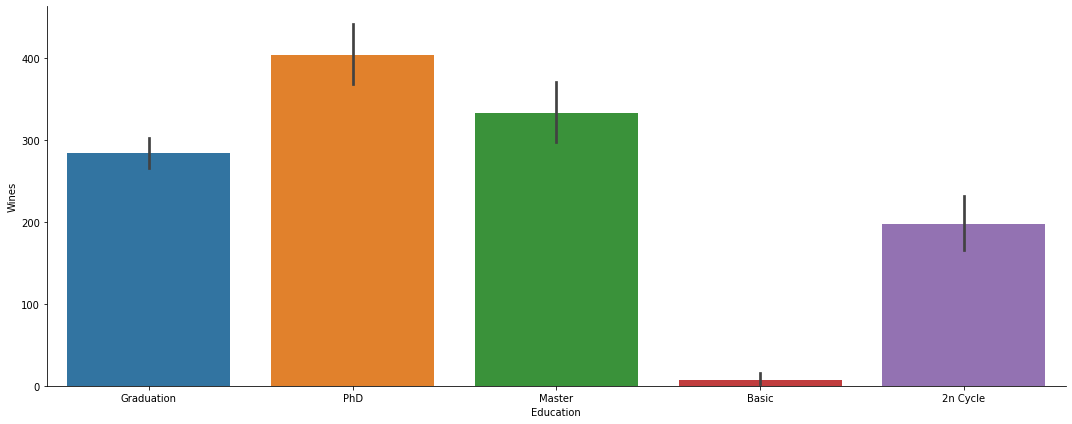

In [6]:
sns.catplot(x="Education",y="Wines",data=df,kind="bar",height=6,aspect=2.5)

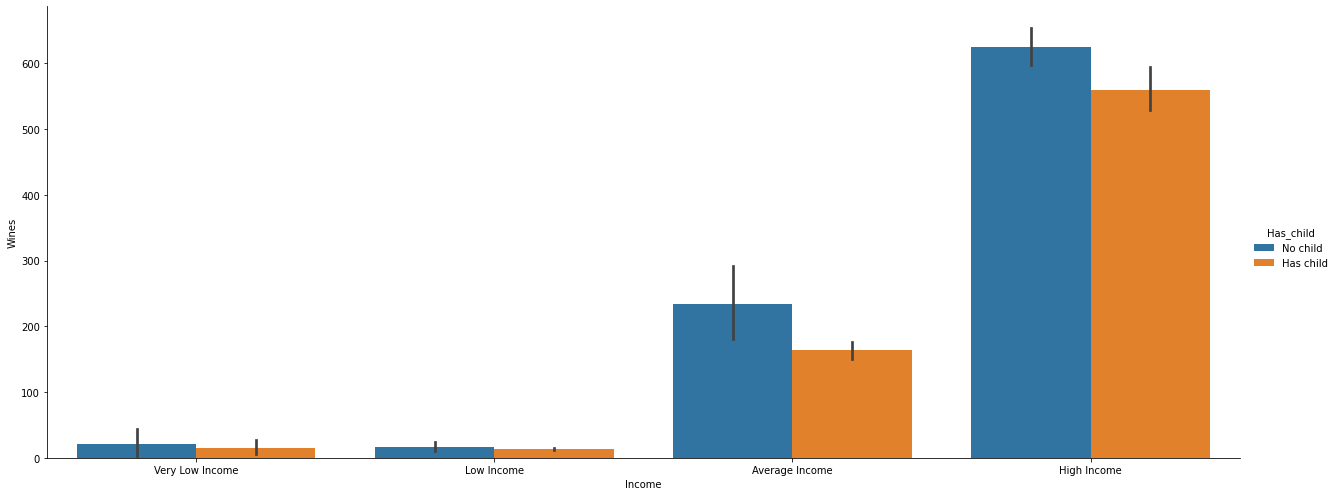

In [7]:
sns.catplot(x="Income",y="Wines",hue="Has_child", data=df,height=7,aspect=2.5,kind="bar")


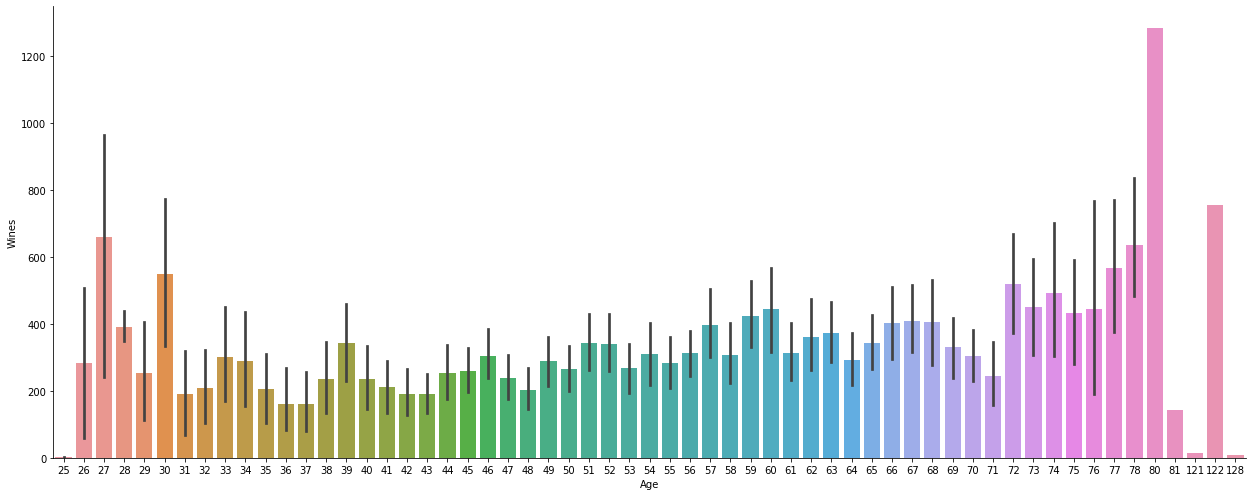

In [8]:
sns.catplot(x="Age",y="Wines", data=df,height=7,aspect=2.5,kind="bar")

<AxesSubplot:xlabel='Age', ylabel='Wines'>

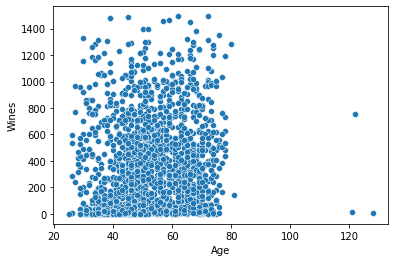

In [9]:
sns.scatterplot(x="Age",y="Wines",data=df)